In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [164]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)


In [165]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [166]:
df.replace({'diagnosis' : {'M': 0,'B' : 1 }}, inplace= True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4420\4044943700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'diagnosis' : {'M': 0,'B' : 1 }}, inplace= True)


In [167]:
X = df.drop(columns='diagnosis',axis=1)
y = df['diagnosis']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [168]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [169]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [175]:
model = Sequential()

model.add(Dense(30,activation='relu',input_dim=30))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [176]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [177]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [178]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3718 - loss: 26.4372 - val_accuracy: 0.3947 - val_loss: 12.3401
Epoch 2/3500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3718 - loss: 10.0357 - val_accuracy: 0.3947 - val_loss: 3.7774
Epoch 3/3500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3718 - loss: 2.5785 - val_accuracy: 0.8596 - val_loss: 0.5687
Epoch 4/3500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7560 - loss: 0.6314 - val_accuracy: 0.8158 - val_loss: 0.5246
Epoch 5/3500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8458 - loss: 0.4980 - val_accuracy: 0.7895 - val_loss: 0.4736
Epoch 6/3500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.4734 - val_accuracy: 0.9123 - val_loss: 0.4186
Epoch 7/3500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9066 - loss: 0.4340 - val_accuracy: 0.9035 - val_loss: 0.4027
Epoch 8/3500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9015 - loss: 0.4205 - val_accuracy

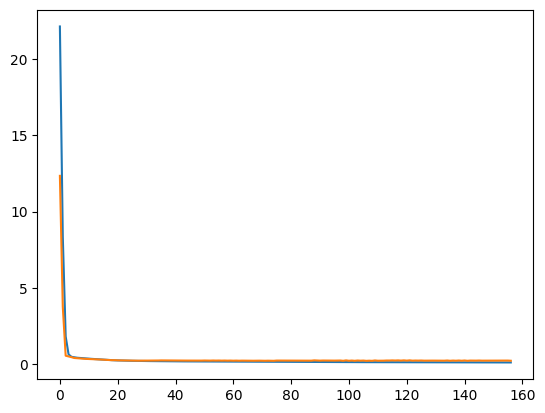

In [179]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

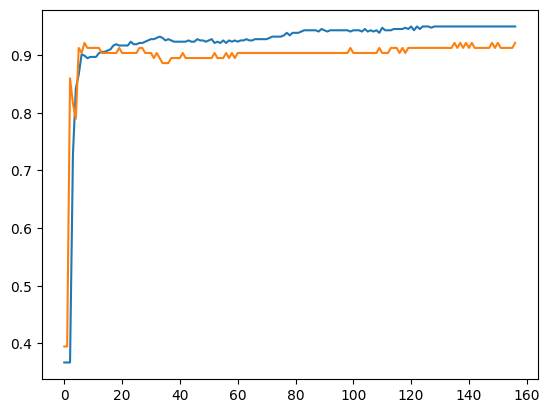

In [180]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [184]:
y_log=model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.8157894736842105

In [189]:
input_data = (13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,0.271,0.7927,1.819,22.79,0.008584,0.02017,0.03047,0.009536,0.02769,0.003479,14.77,20.5,97.67,677.3,0.1478,0.2256,0.3009,0.09722,0.3849,0.08633
)

input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.61706525]]
[0]
The tumor is Malignant


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
